In [44]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [65]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

cancer = load_breast_cancer()
X, y = scale(cancer.data), cancer.target
X.shape

(569, 30)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

logreg = LogisticRegression()
logreg.fit(X_train[:, :2], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
np.dot((line2[30] - line2[20], line[30] - line[20]), coef)

2.7755575615628914e-16

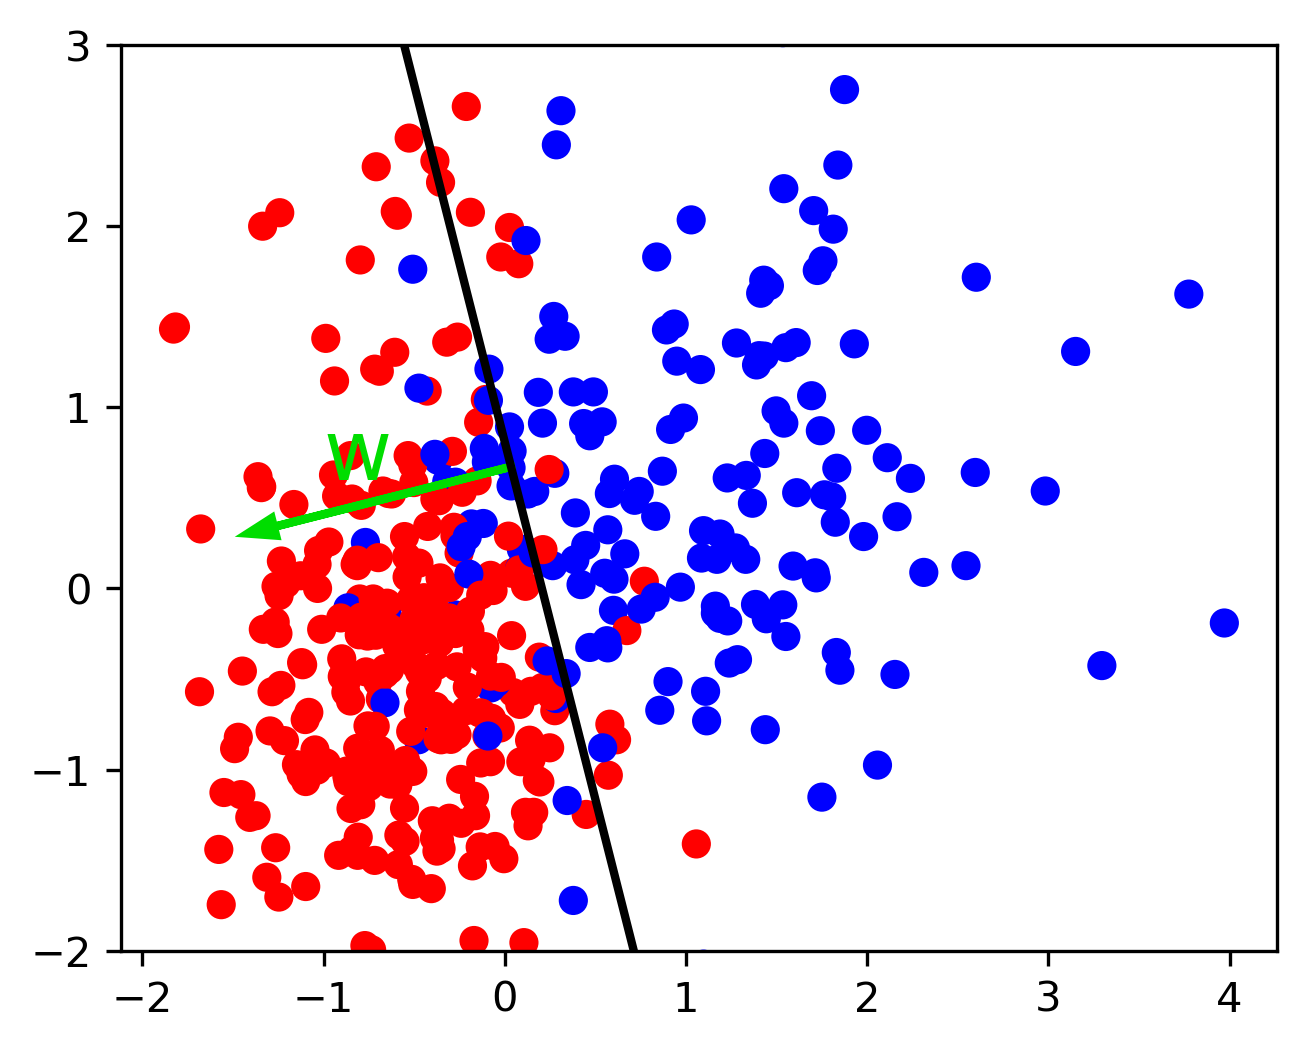

In [97]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr")
coef = logreg.coef_.ravel()
line = np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
line2 = - (line * coef[1]  + logreg.intercept_) / coef[0]
plt.plot(line2, line, c='k', linewidth=2)
plt.arrow(line2[20], line[20], .4 * coef[0], .4 * coef[1], color='#00dd00', linewidth=2, head_width=.1)
plt.text(-1, .6, "w", color='#00dd00', fontsize=20)
plt.ylim(-2, 3)
plt.gca().set_aspect("equal")
plt.savefig("images/linear_boundary_vector.png")

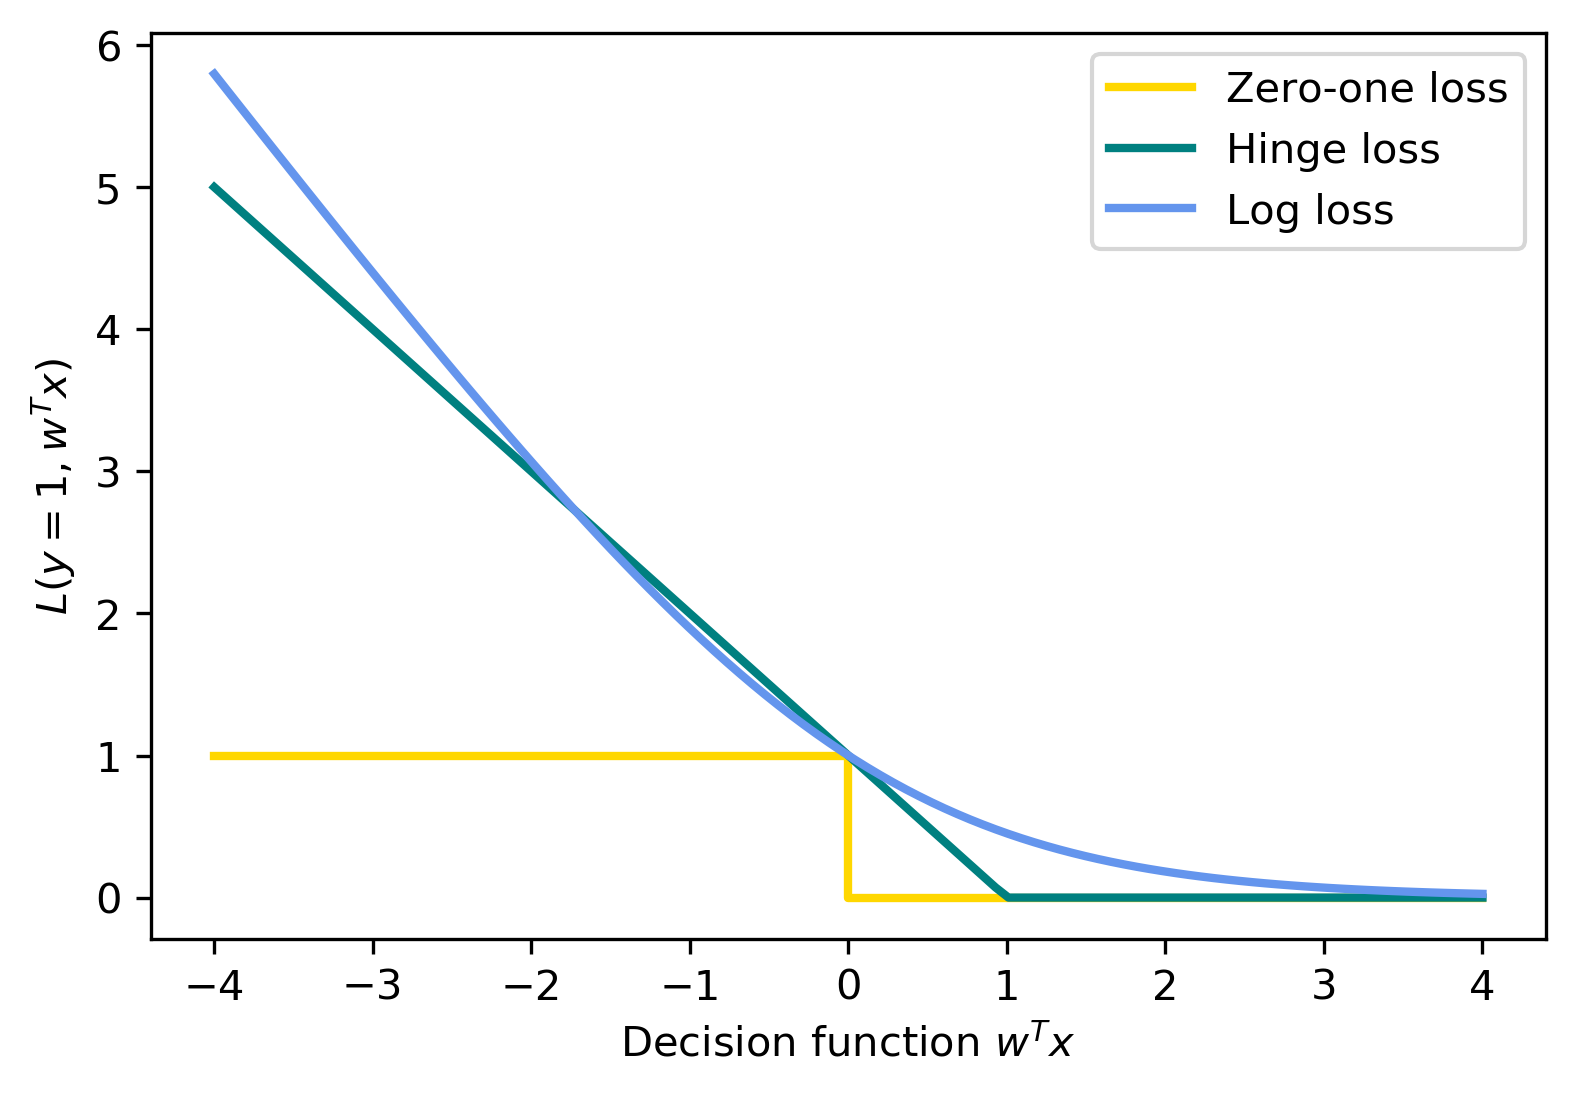

In [99]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")

plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
#plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
#         label="Squared hinge loss")

#plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $w^Tx$")
plt.ylabel("$L(y=1, w^Tx) $")
plt.savefig("images/binary_loss.png")

/home/andy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


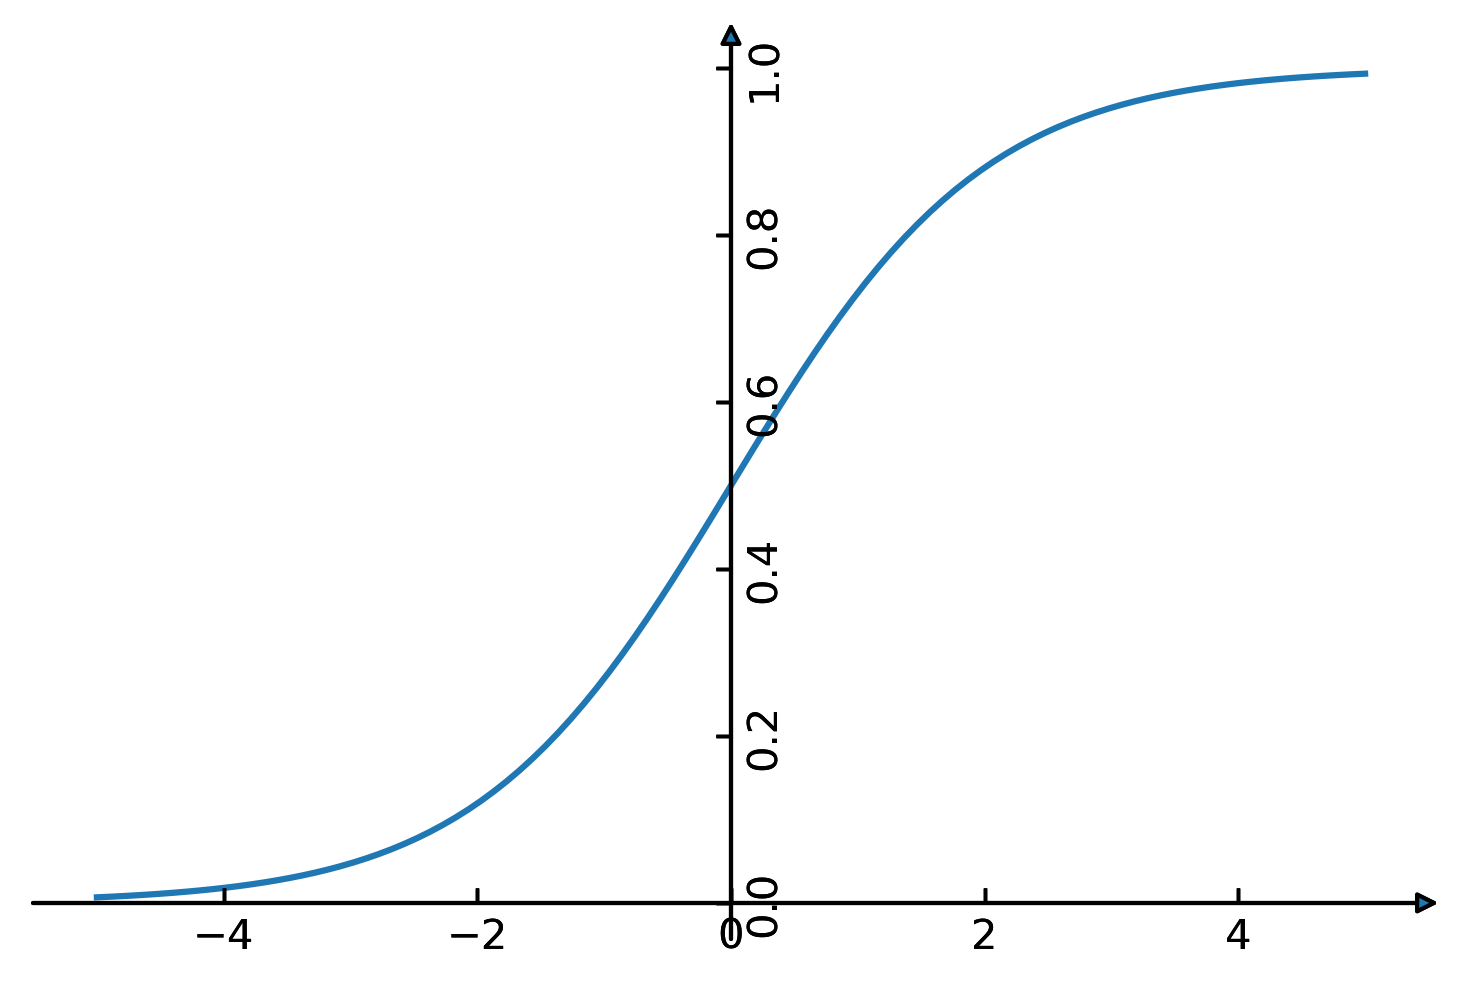

In [6]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

line =  np.linspace(-5, 5, 100)   
ax.plot(line, 1. / (1 + np.exp(-line)))

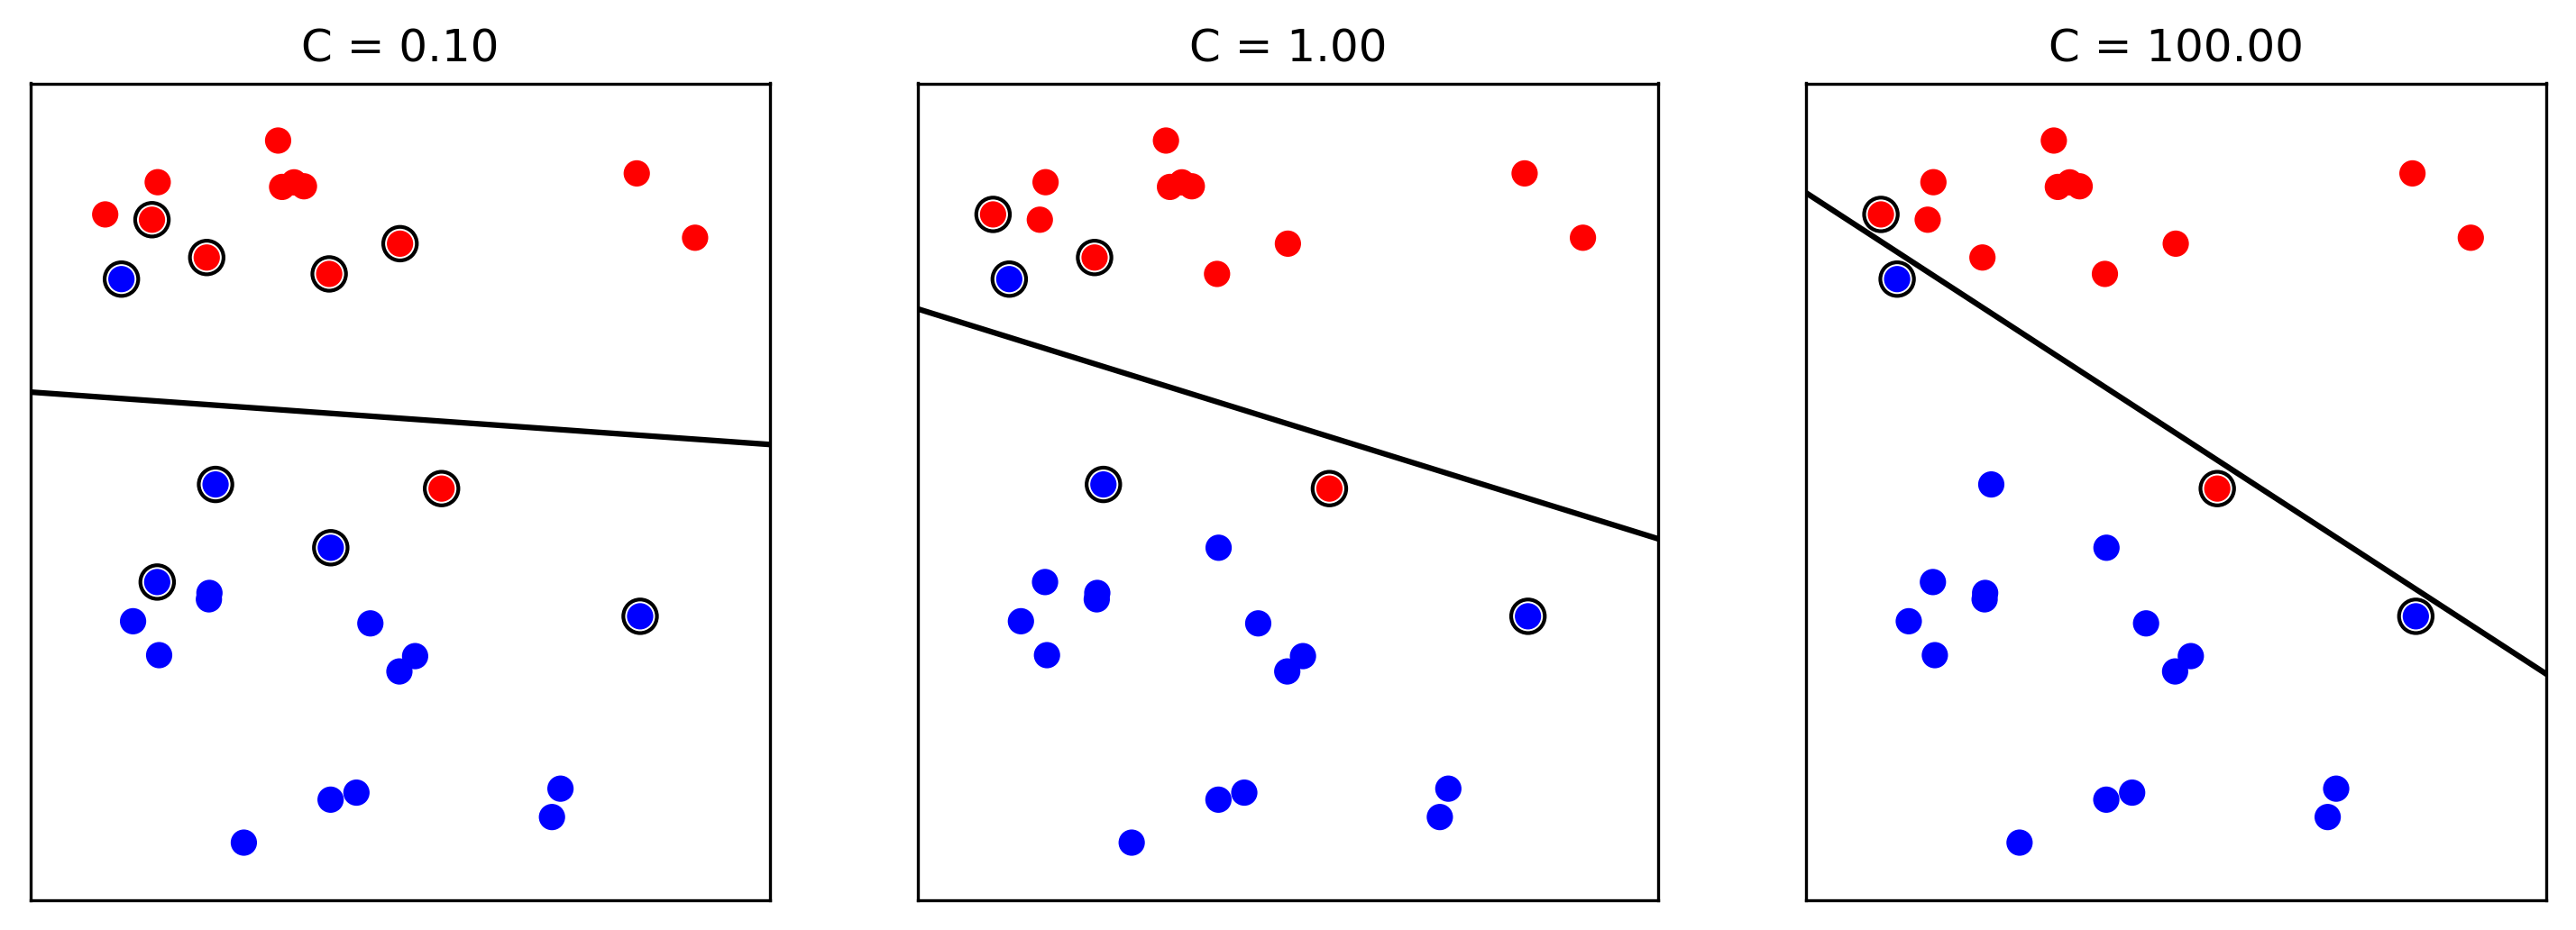

In [41]:
X, y = make_blobs(centers=2, random_state=4, n_samples=30)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# a carefully hand-designed dataset lol
y[7] = 0
y[27] = 0
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

for ax, C in zip(axes, [1e-1, 1, 1e2]):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)

    svm = SVC(kernel='linear', C=C, tol=0.00001).fit(X, y)
    # using SVC instead of LinearSVC so we can get support vectors more easily
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(6, 13)
    yy = a * xx - (svm.intercept_[0]) / w[1]
    ax.plot(xx, yy, c='k')
    
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("C = %.2f" % C)
axes[0].legend(loc="best")
plt.savefig("images/linear_svm_regularization.png")

# Multiclass

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
print(np.bincount(y))

(150, 4)
[50 50 50]


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs").fit(X, y)
linearsvm = LinearSVC().fit(X, y)
print(logreg.coef_.shape)
print(linearsvm.coef_.shape)

(3, 4)
(3, 4)


In [9]:
logreg.coef_

array([[-0.4234039 ,  0.96173599, -2.51955693, -1.08586822],
       [ 0.53419209, -0.31800647, -0.20538736, -0.93973102],
       [-0.11078819, -0.64372952,  2.72494429,  2.02559923]])

In [10]:
logreg.intercept_

array([  9.88131906,   2.21931477, -12.10063383])

In [11]:
from sklearn.preprocessing import scale
logreg = LogisticRegression(fit_intercept=False, multi_class="multinomial", solver="lbfgs").fit(scale(X), y)

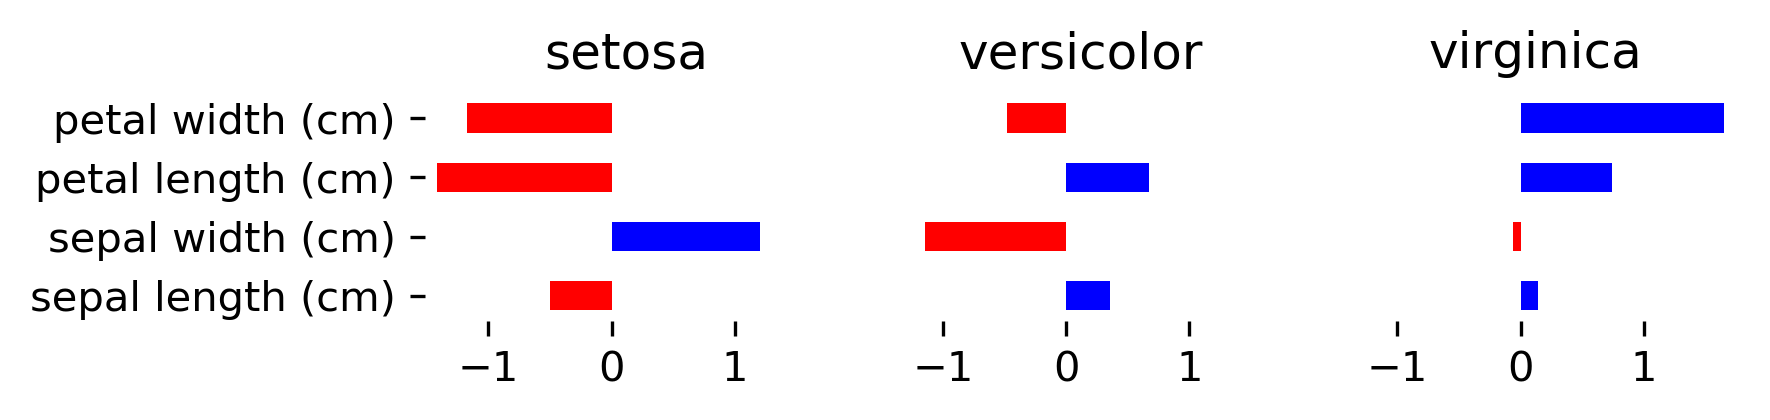

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(6, 1.5))
for ax, coef, classname in zip(axes, logreg.coef_, iris.target_names):
    ax.barh(range(4), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(logreg.coef_.min() - .1, logreg.coef_.max() + .1)

    ax.set_title(classname)
    ax.set_frame_on(False)
    ax.set_yticks(())
    
axes[0].set_yticks(range(4))
axes[0].set_yticklabels(iris.feature_names)
plt.tight_layout()


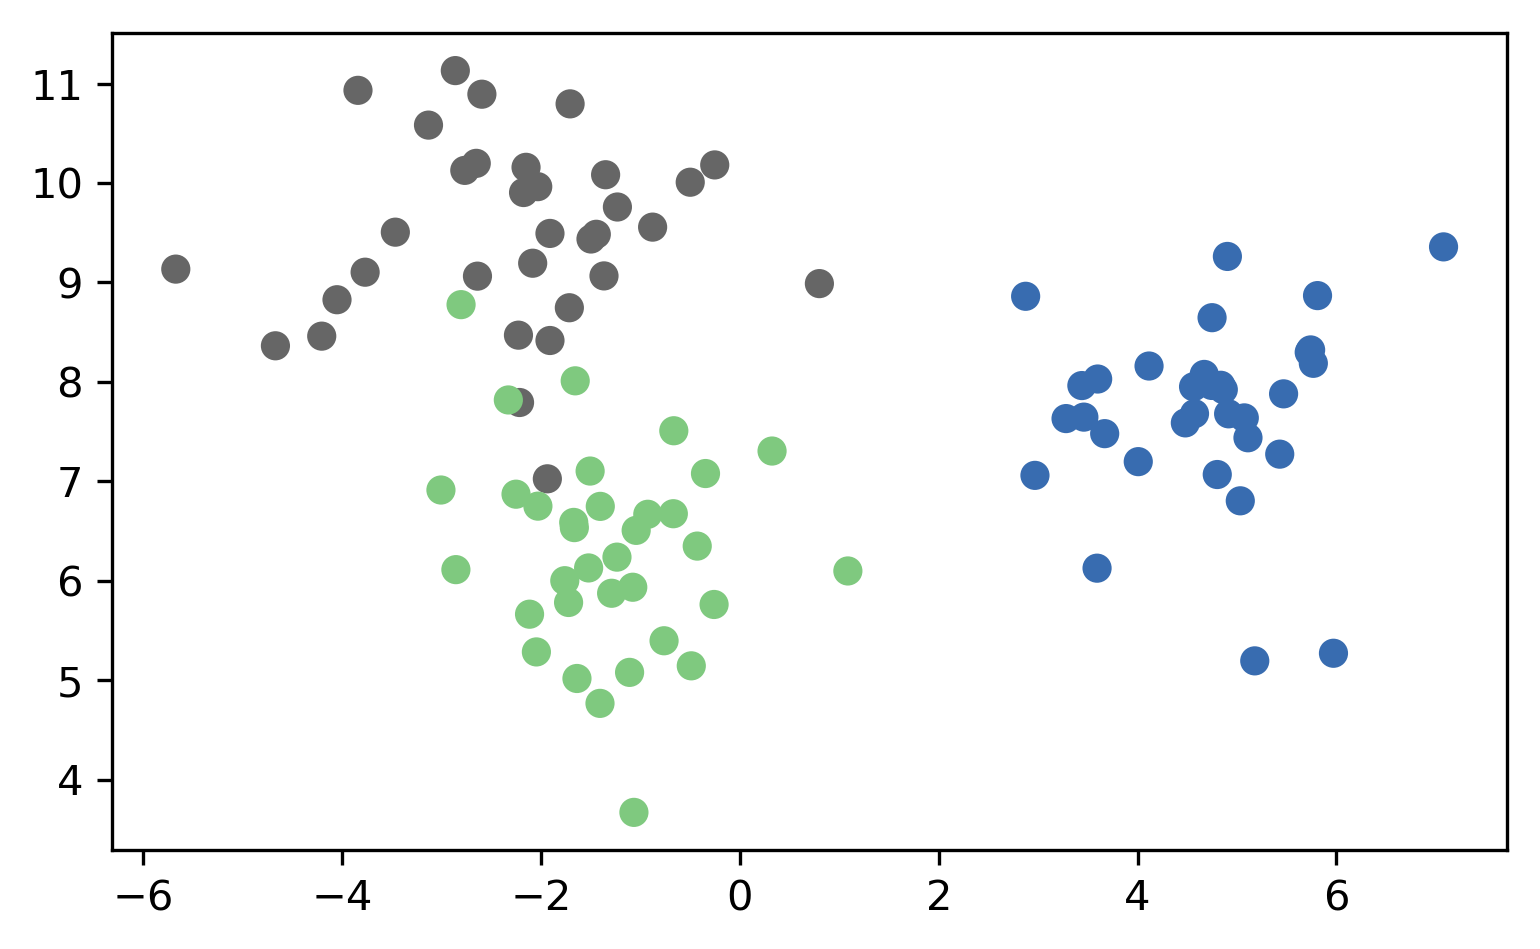

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
ax = plt.gca()
ax.set_aspect("equal")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# OVR

In [14]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=100).fit(X, y)

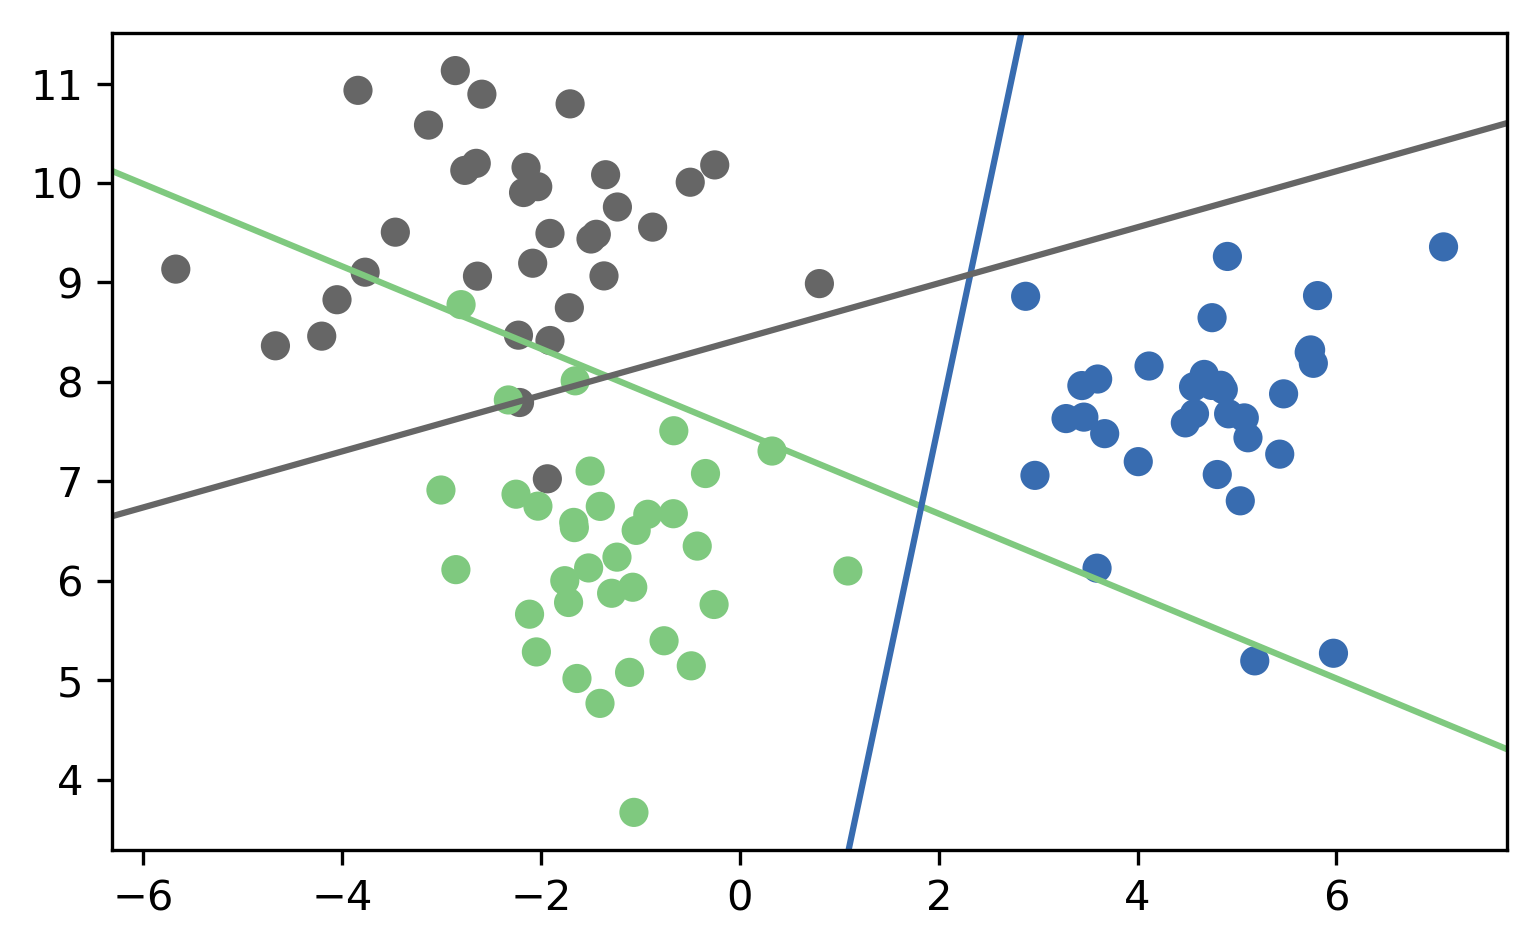

In [17]:
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
colors = [plt.cm.Accent(i) for i in [0, 4, 7]]
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
plt.gca().set_aspect("equal")
plt.xlim(xlim)
plt.ylim(ylim)
plt.savefig("images/ovr_lines.png")

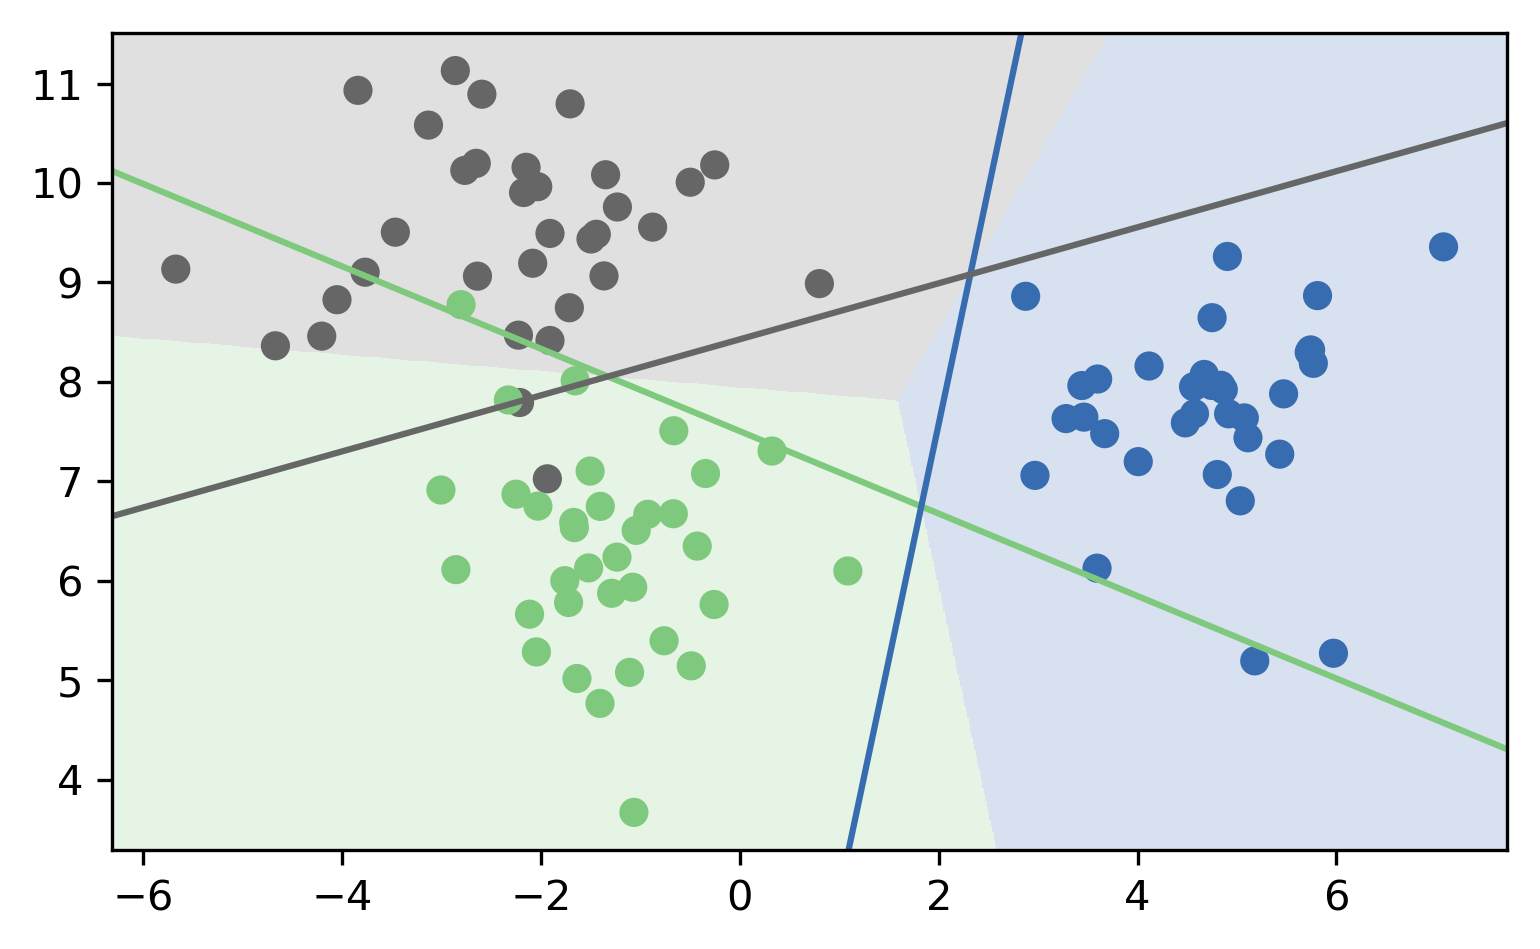

In [18]:
import matplotlib as mpl

xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")
plt.savefig("images/ovr_boundaries.png")

# OVO

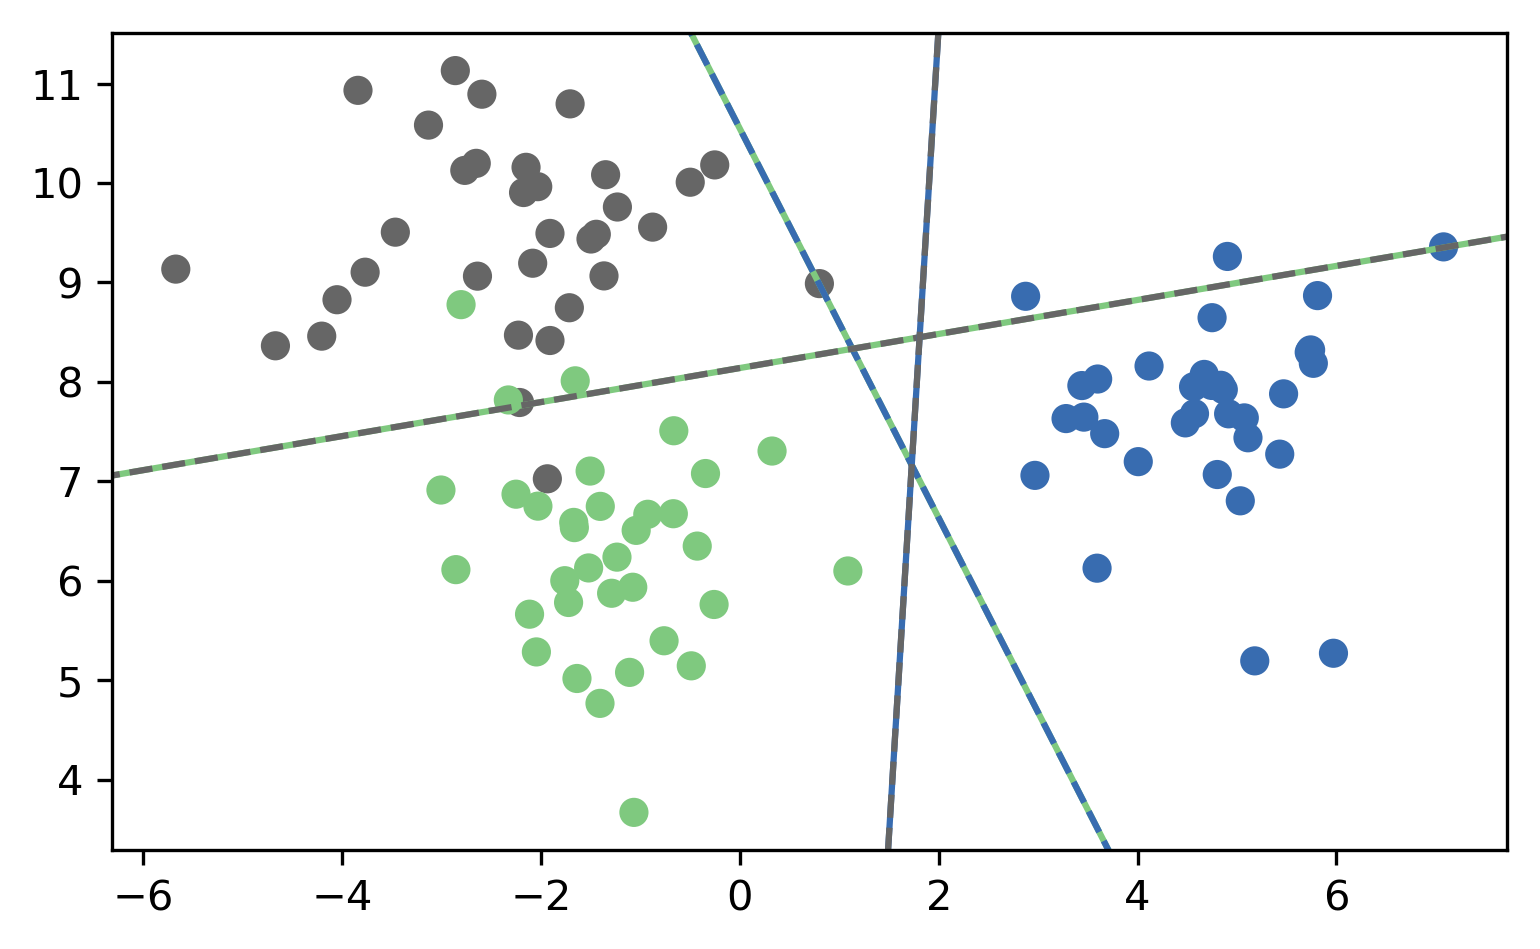

In [19]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=100).fit(X, y)
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
classes = [(0, 1), (0, 2), (1, 2)]
for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])

plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")
plt.savefig("images/ovo_lines.png")

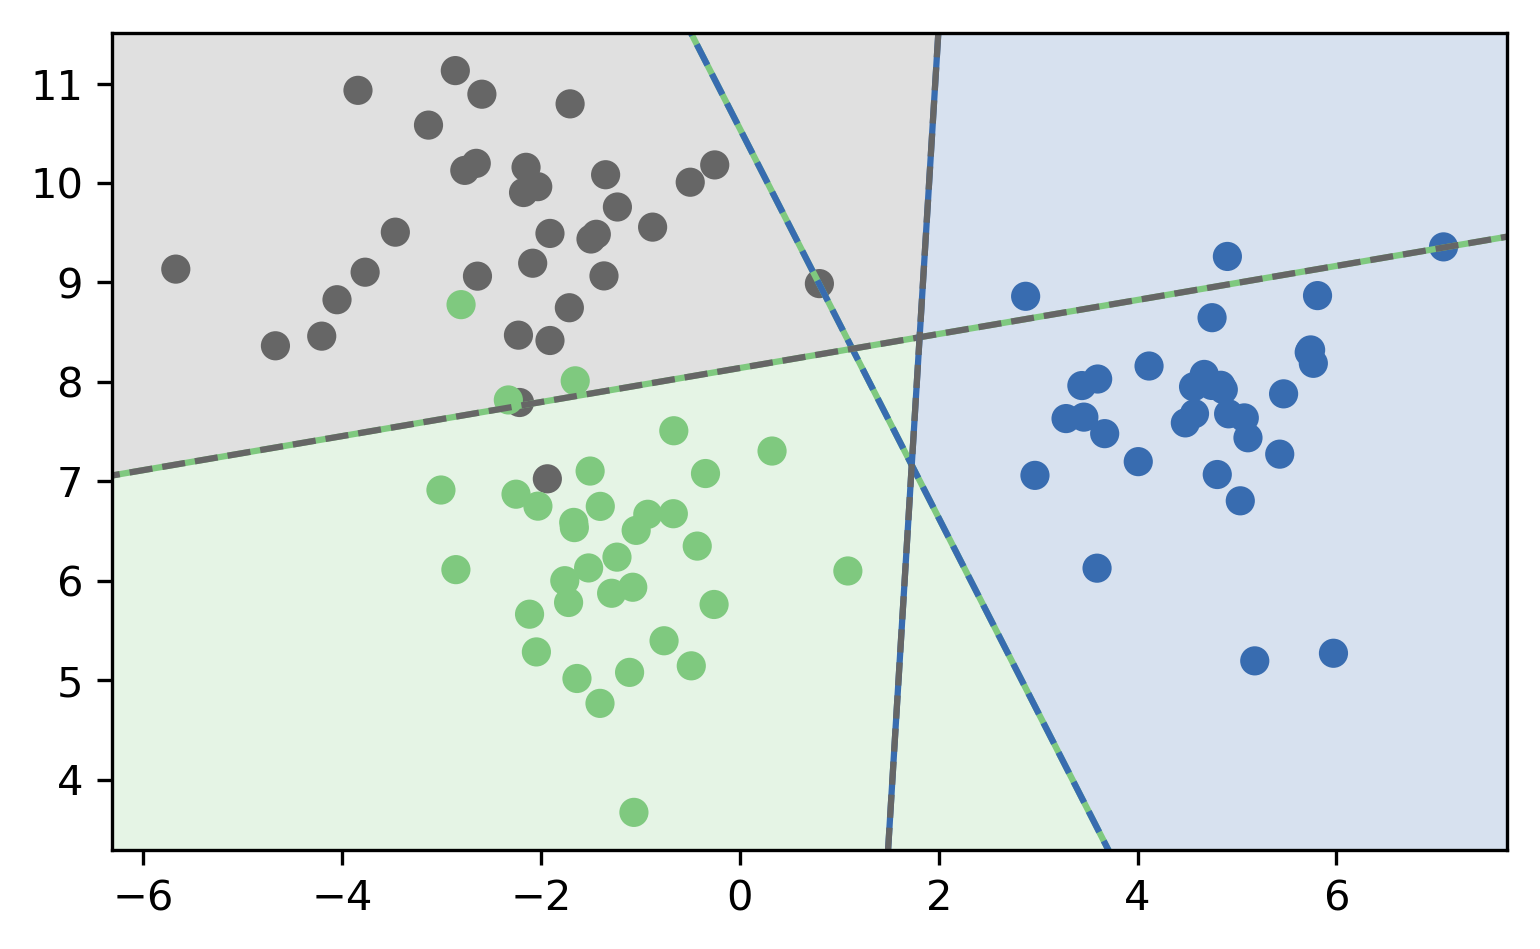

In [20]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)

svm = SVC(kernel="linear", C=100).fit(X, y)

points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")
plt.savefig("images/ovo_boundaries.png")

# Efficient CV

In [44]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=42)

grid = GridSearchCV(Ridge(), param_grid={'alpha': np.linspace(.1, 1, 10)}, cv=10)
grid.fit(X_train, y_train)
print("Grid-search score: {:.2f}".format(grid.score(X_test, y_test)))
print("grid alpha: {}".format(grid.best_params_['alpha']))

ridge = RidgeCV().fit(X_train, y_train)
print("ridgecv score: {:.2f}".format(ridge.score(X_test, y_test)))
print("ridgecv alpha: {}".format(ridge.alpha_))

Grid-search score: 0.68
grid alpha: 0.1
ridgecv score: 0.68
ridgecv alpha: 0.1


# Gradient Descent on Branin function

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def branin(x):
    x1 = x[0]
    x2 = x[1]
    a = 1.
    b = 5.1 / (4.*np.pi**2)
    c = 5. / np.pi
    r = 6.
    s = 10.
    t = 1. / (8.*np.pi)
    ret  = a*(x2-b*x1**2+c*x1-r)**2+s*(1-t)*np.cos(x1)+s
    return ret

def branin_derivative(x):
    x1 = x[0]
    x2 = x[1]
    a = 1.
    b = 5.1 / (4.*np.pi**2)
    c = 5. / np.pi
    r = 6.
    s = 10.
    t = 1. / (8.*np.pi)
    # d  = a*(x2-b*x1**2+c*x1-r)**2 + s*(1-t)*np.cos(x1)+s
    d1 = (-2*b*x1 + c)*a*2*(x2-b*x1**2+c*x1-r) - s*(1-t)*np.sin(x1)
    d2 = 2 * a * (x2-b*x1**2+c*x1-r)
    return d1, d2
    

range_x = np.linspace(-5, 10, 100)
range_y = np.linspace(0, 15, 100)
xx, yy = np.meshgrid(range_x, range_y)
res = np.array([branin(x) for x in zip(xx.ravel(), yy.ravel())])
res = res.reshape(xx.shape)

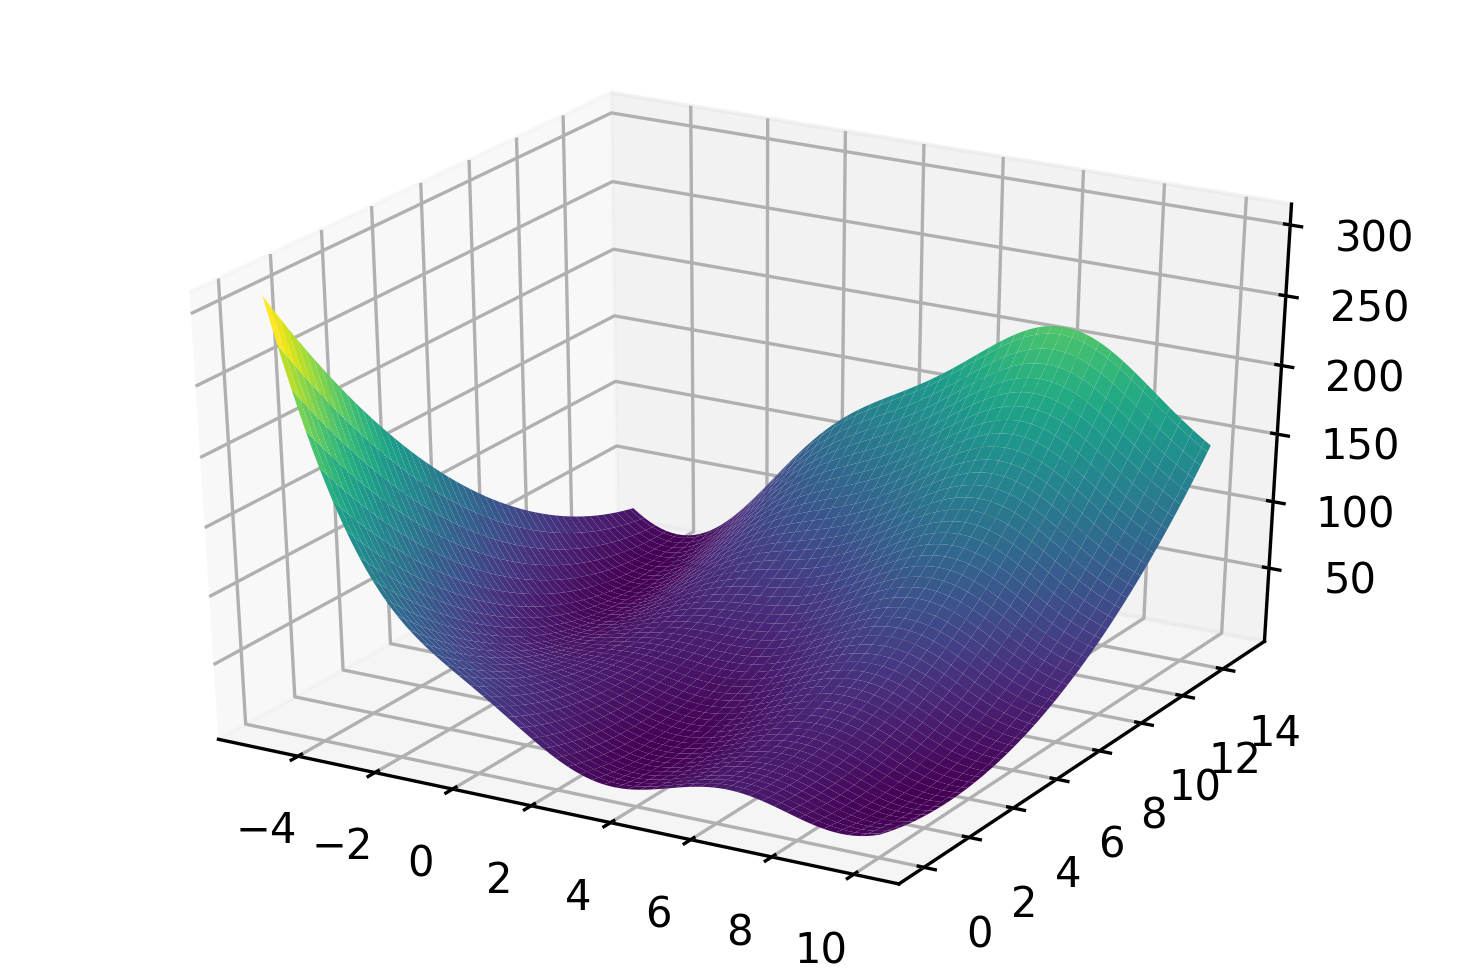

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

surf = ax.plot_surface(xx, yy, res, cmap="viridis",
                       linewidth=0)
plt.show()


[  5.85922718  13.24830687]
166.097194351
[ 3.13570383  2.30924523]
0.398932870612
[ 5.18430522  2.3455426 ]
15.6296204426


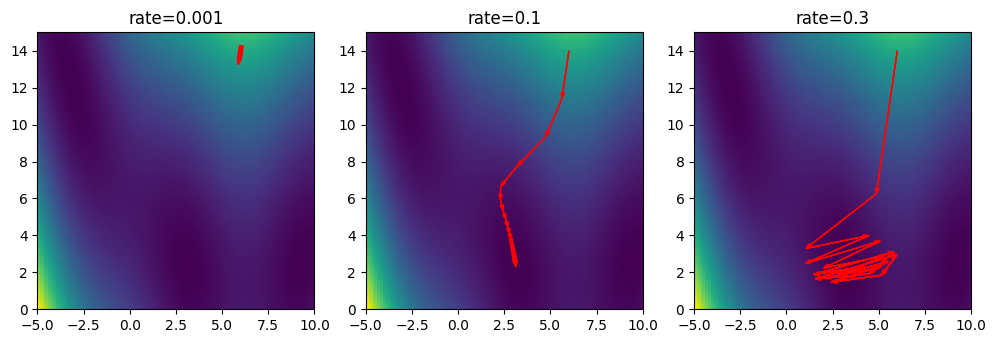

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), dpi=100)
for ax, rate in zip(axes, [0.001, 0.1, 0.3]):
    ax.set_title("rate={}".format(rate))
    ax.imshow(res, origin="lower", extent=(range_x[0], range_x[-1], range_y[0], range_y[-1]))
    x = np.array((6, 14))
    for i in range(30):
        step = -rate * np.array(branin_derivative(x))
        ax.arrow(x[0], x[1], step[0], step[1], color='r', head_width=0.2, length_includes_head=True)
        x = x + step
    print(x)
    print(branin(x))
plt.tight_layout()

[ 2.85754784  3.7740132 ]
2.38812635515


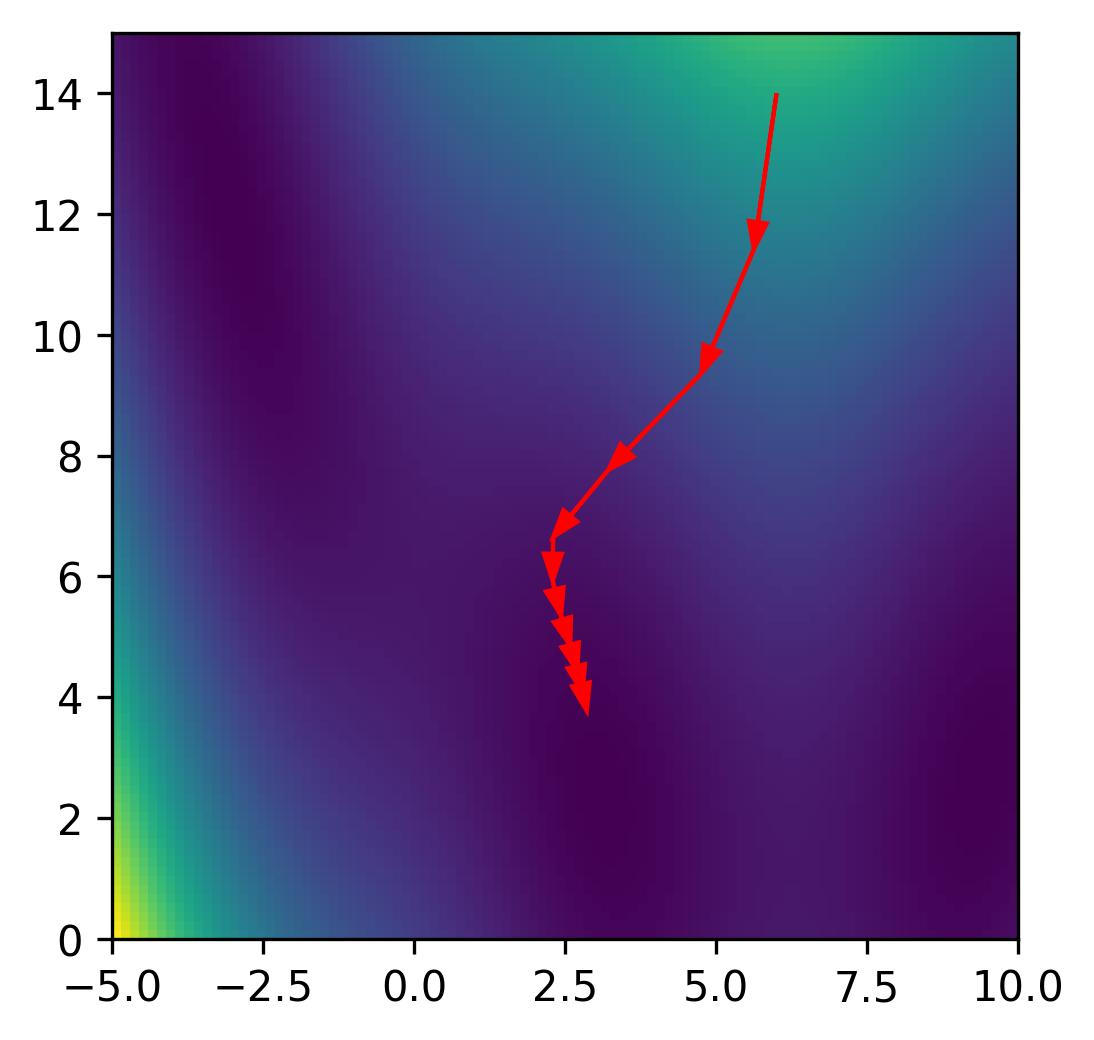

In [23]:
plt.figure()
plt.imshow(res, origin="lower", extent=(range_x[0], range_x[-1], range_y[0], range_y[-1]))
x = np.array((6, 14))
for i in range(10):
    grad = -0.1 * np.array(branin_derivative(x))
    plt.arrow(x[0], x[1], grad[0], grad[1], color='r', head_width=0.3, length_includes_head=True)
    x = x + grad
print(x)
print(branin(x))

In [24]:
from sklearn.linear_model import SGDClassifier
SGDClassifier()

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

lda = LinearDiscriminantAnalysis()
np.mean(cross_val_score(lda, iris.data, iris.target, cv=10))

0.98000000000000009

In [26]:
from sklearn.utils import gen_batches, shuffle

X_train, X_test, y_train, y_test = train_test_split(scale(iris.data),
                                                    iris.target, stratify=iris.target)
batches = [(X_train[batch], y_train[batch]) for batch in gen_batches(X_train.shape[0], 5)]

sgd = SGDClassifier()
for X_batch, y_batch in batches:
    sgd.partial_fit(X_batch, y_batch, classes=[0, 1, 2])
sgd.score(X_test, y_test)

0.76315789473684215

In [27]:
sgd = SGDClassifier()
for i in range(10):
    for X_batch, y_batch in batches:
        sgd.partial_fit(X_batch, y_batch, classes=[0, 1, 2])
sgd.score(X_test, y_test)

0.86842105263157898